In [1]:
# import required packages
import pandas as pd
from scipy import stats
import os
import glob

In [3]:
# set working directory to where data files are
# REPLACE the following line with the location where you downloaded the workshop files
FILES = "U:\\Documents\\workshops summer 2023\\summer repro package"

os.chdir(os.path.join(FILES, "Data", "presidents"))

In [4]:
# let's find out the names of all the CSV files in this directory
print(glob.glob("*.csv"))

['president2008.csv', 'president2012.csv', 'president2016.csv', 'president2020.csv']


In [5]:
datasets_merged = None
for filename in glob.glob("*.csv"):
    current_file = pd.read_csv(filename)
    if datasets_merged is None:
        datasets_merged = current_file
    else:
        datasets_merged = datasets_merged.merge(current_file, how="outer")
display(datasets_merged)

,fips,name,type,totalvote2008,democrat2008,republican2008,others2008,write_ins2008,none_of_these_candidates2008,totalvote2012,...,republican2016,others2016,write_ins2016,none_of_these_candidates2016,totalvote2020,democrat2020,republican2020,others2020,write_ins2020,none_of_these_candidates2020
0,1001,Autauga,County,23641.0,6093.0,17403.0,121.0,24.0,0.0,23973.0,...,18172.0,651.0,214.0,0.0,27770.0,7503.0,19838.0,350.0,79.0,0.0
1,1003,Baldwin,County,81413.0,19386.0,61271.0,640.0,116.0,0.0,85491.0,...,72883.0,2920.0,954.0,0.0,109679.0,24578.0,83544.0,1229.0,328.0,0.0
2,1005,Barbour,County,11630.0,5697.0,5866.0,58.0,9.0,0.0,11517.0,...,5454.0,111.0,33.0,0.0,10518.0,4816.0,5622.0,68.0,12.0,0.0
3,1007,Bibb,County,8644.0,2299.0,6262.0,69.0,14.0,0.0,8420.0,...,6738.0,141.0,66.0,0.0,9595.0,1986.0,7525.0,74.0,10.0,0.0
4,1009,Blount,County,24267.0,3522.0,20389.0,292.0,64.0,0.0,24060.0,...,22859.0,427.0,146.0,0.0,27588.0,2640.0,24711.0,209.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,56037,Sweetwat,County,16703.0,5762.0,10360.0,440.0,141.0,0.0,16895.0,...,12154.0,1275.0,470.0,0.0,16603.0,3823.0,12229.0,468.0,83.0,0.0
3157,56039,Teton,County,12316.0,7472.0,4565.0,216.0,63.0,0.0,11464.0,...,3921.0,943.0,449.0,0.0,14677.0,9848.0,4341.0,344.0,144.0,0.0
3158,56041,Uinta,County,8383.0,2317.0,5763.0,238.0,65.0,0.0,8539.0,...,6154.0,697.0,417.0,0.0,9402.0,1591.0,7496.0,251.0,64.0,0.0
3159,56043,Washakie,County,4089.0,1042.0,2956.0,62.0,29.0,0.0,3944.0,...,2911.0,272.0,99.0,0.0,4012.0,651.0,3245.0,97.0,19.0,0.0


In [6]:
# Only keep rows where type is County, and only keep the important columns
important_cols = ["fips", "name", "type", "totalvote2008", "democrat2008", "republican2008", "others2008", 
         "totalvote2012", "democrat2012", "republican2012", "others2012", 
         "totalvote2016", "democrat2016", "republican2016", "others2016",
         "totalvote2020", "democrat2020", "republican2020", "others2020"]
data_w = datasets_merged[datasets_merged.type=="County"][important_cols]
display(data_w)

,fips,name,type,totalvote2008,democrat2008,republican2008,others2008,totalvote2012,democrat2012,republican2012,others2012,totalvote2016,democrat2016,republican2016,others2016,totalvote2020,democrat2020,republican2020,others2020
0,1001,Autauga,County,23641.0,6093.0,17403.0,121.0,23973.0,6363.0,17379.0,231.0,24973.0,5936.0,18172.0,651.0,27770.0,7503.0,19838.0,350.0
1,1003,Baldwin,County,81413.0,19386.0,61271.0,640.0,85491.0,18424.0,66016.0,1051.0,95215.0,18458.0,72883.0,2920.0,109679.0,24578.0,83544.0,1229.0
2,1005,Barbour,County,11630.0,5697.0,5866.0,58.0,11517.0,5912.0,5550.0,55.0,10469.0,4871.0,5454.0,111.0,10518.0,4816.0,5622.0,68.0
3,1007,Bibb,County,8644.0,2299.0,6262.0,69.0,8420.0,2202.0,6132.0,86.0,8819.0,1874.0,6738.0,141.0,9595.0,1986.0,7525.0,74.0
4,1009,Blount,County,24267.0,3522.0,20389.0,292.0,24060.0,2970.0,20757.0,333.0,25588.0,2156.0,22859.0,427.0,27588.0,2640.0,24711.0,209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,56037,Sweetwat,County,16703.0,5762.0,10360.0,440.0,16895.0,4774.0,11428.0,693.0,17130.0,3231.0,12154.0,1275.0,16603.0,3823.0,12229.0,468.0
3157,56039,Teton,County,12316.0,7472.0,4565.0,216.0,11464.0,6213.0,4858.0,393.0,12627.0,7314.0,3921.0,943.0,14677.0,9848.0,4341.0,344.0
3158,56041,Uinta,County,8383.0,2317.0,5763.0,238.0,8539.0,1628.0,6615.0,296.0,8470.0,1202.0,6154.0,697.0,9402.0,1591.0,7496.0,251.0
3159,56043,Washakie,County,4089.0,1042.0,2956.0,62.0,3944.0,794.0,3014.0,136.0,3814.0,532.0,2911.0,272.0,4012.0,651.0,3245.0,97.0


In [7]:
# create new columns for percentage of total vote to dems and reps 2008. 
data_w["demp2008"] = data_w["democrat2008"] / data_w["totalvote2008"]
data_w["repp2008"] = data_w["republican2008"] / data_w["totalvote2008"]
display(data_w)

,fips,name,type,totalvote2008,democrat2008,republican2008,others2008,totalvote2012,democrat2012,republican2012,...,totalvote2016,democrat2016,republican2016,others2016,totalvote2020,democrat2020,republican2020,others2020,demp2008,repp2008
0,1001,Autauga,County,23641.0,6093.0,17403.0,121.0,23973.0,6363.0,17379.0,...,24973.0,5936.0,18172.0,651.0,27770.0,7503.0,19838.0,350.0,0.257730,0.736136
1,1003,Baldwin,County,81413.0,19386.0,61271.0,640.0,85491.0,18424.0,66016.0,...,95215.0,18458.0,72883.0,2920.0,109679.0,24578.0,83544.0,1229.0,0.238119,0.752595
2,1005,Barbour,County,11630.0,5697.0,5866.0,58.0,11517.0,5912.0,5550.0,...,10469.0,4871.0,5454.0,111.0,10518.0,4816.0,5622.0,68.0,0.489854,0.504385
3,1007,Bibb,County,8644.0,2299.0,6262.0,69.0,8420.0,2202.0,6132.0,...,8819.0,1874.0,6738.0,141.0,9595.0,1986.0,7525.0,74.0,0.265965,0.724433
4,1009,Blount,County,24267.0,3522.0,20389.0,292.0,24060.0,2970.0,20757.0,...,25588.0,2156.0,22859.0,427.0,27588.0,2640.0,24711.0,209.0,0.145135,0.840195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,56037,Sweetwat,County,16703.0,5762.0,10360.0,440.0,16895.0,4774.0,11428.0,...,17130.0,3231.0,12154.0,1275.0,16603.0,3823.0,12229.0,468.0,0.344968,0.620248
3157,56039,Teton,County,12316.0,7472.0,4565.0,216.0,11464.0,6213.0,4858.0,...,12627.0,7314.0,3921.0,943.0,14677.0,9848.0,4341.0,344.0,0.606690,0.370656
3158,56041,Uinta,County,8383.0,2317.0,5763.0,238.0,8539.0,1628.0,6615.0,...,8470.0,1202.0,6154.0,697.0,9402.0,1591.0,7496.0,251.0,0.276393,0.687463
3159,56043,Washakie,County,4089.0,1042.0,2956.0,62.0,3944.0,794.0,3014.0,...,3814.0,532.0,2911.0,272.0,4012.0,651.0,3245.0,97.0,0.254830,0.722915


In [8]:
# T-test comparing democratic proportion to republican specifically for 2008
t, p = stats.ttest_ind(data_w["demp2008"], data_w["repp2008"], nan_policy="omit")
print(t)
print(p)

-43.77777777315531
0.0


In [10]:
#Create proportion variable for 2020
data_w["repp2020"] = data_w["republican2020"] / data_w["totalvote2020"]
# T-test comparing republican2008 proportion to republican2020
t, p = stats.ttest_ind(data_w["repp2020"], data_w["repp2008"], nan_policy="omit")
print(t)
print(p)

21.920182986900198
1.5800823666872249e-102


In [14]:
# reshape data to be long format
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
data_L = pd.wide_to_long(data_w, stubnames=["totalvote", "democrat", "republican", "others"], i="fips", j="year").reset_index()
display(data_L)

,fips,year,repp2020,repp2008,name,type,demp2008,totalvote,democrat,republican,others
0,1001,2008,0.714368,0.736136,Autauga,County,0.257730,23641.0,6093.0,17403.0,121.0
1,1003,2008,0.761714,0.752595,Baldwin,County,0.238119,81413.0,19386.0,61271.0,640.0
2,1005,2008,0.534512,0.504385,Barbour,County,0.489854,11630.0,5697.0,5866.0,58.0
3,1007,2008,0.784263,0.724433,Bibb,County,0.265965,8644.0,2299.0,6262.0,69.0
4,1009,2008,0.895716,0.840195,Blount,County,0.145135,24267.0,3522.0,20389.0,292.0
...,...,...,...,...,...,...,...,...,...,...,...
12031,56037,2020,0.736554,0.620248,Sweetwat,County,0.344968,16603.0,3823.0,12229.0,468.0
12032,56039,2020,0.295769,0.370656,Teton,County,0.606690,14677.0,9848.0,4341.0,344.0
12033,56041,2020,0.797277,0.687463,Uinta,County,0.276393,9402.0,1591.0,7496.0,251.0
12034,56043,2020,0.808824,0.722915,Washakie,County,0.254830,4012.0,651.0,3245.0,97.0


In [15]:
# create new columns for percentage of total vote to dems and reps
data_L["demp"] = data_L["democrat"] / data_L["totalvote"]
data_L["repp"] = data_L["republican"] / data_L["totalvote"]

In [16]:
# T-test comparing democratic proportion to republican all time
t, p = stats.ttest_ind(data_L["demp"], data_L["repp"], nan_policy="omit")
print(t)
print(p)

-128.886587115109
0.0


In [17]:
# SD Test for 2008 democrats and republicans. 
levenes_stat, p = stats.levene(data_w.dropna()["demp2008"], data_w.dropna()["repp2008"])
print(levenes_stat)
print(p)

0.0019037246657063569
0.9651994375695575


In [18]:
# Same thing but for 2008 only
# Select year = 2008
data2008 = data_L[data_L["year"] == 2008]
# perform T-test
t, p = stats.ttest_ind(data2008["demp"], data2008["repp"], nan_policy="omit")
print(t)
print(p)

-43.77777777315531
0.0


In [19]:
# Create summary dataset. Average proportion of republican and democratic votes for all fips split by years
data_sum = data_L.dropna().groupby("year").aggregate({"demp": "mean", "repp": "mean", "democrat": "sum", "republican": "sum"})
display(data_sum)

,demp,repp,democrat,republican
year,,,,
2008,0.414059,0.569383,67562888.0,58117907.0
2012,0.382570,0.598919,63959769.0,59125545.0
2016,0.310810,0.634439,63987818.0,61182370.0
2020,0.328816,0.653266,79175026.0,72290724.0


In [20]:
# Next compare 2008 to 2012 within political party
data2012 = data_L[data_L["year"] == 2012]
t, p = stats.ttest_ind(data2008["demp"], data2012["demp"], nan_policy="omit")
print(t)
print(p)
t, p = stats.ttest_ind(data2008["repp"], data2012["repp"], nan_policy="omit")
print(t)
print(p)

8.590538226960472
1.0902344295384135e-17
-8.06129005034734
9.035400278367094e-16


In [21]:
# Compare variances of dem and rep in 2008 (via Levene's Test)
levenes_stat, p = stats.levene(data2008.dropna()["demp"], data2008.dropna()["repp"])
print(levenes_stat)
print(p)

0.0019037246657063569
0.9651994375695575


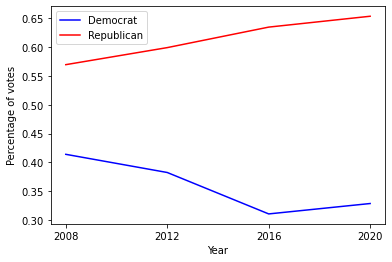

In [22]:
# Create overlapping line graph change of percentage rep and dem votes by year
from matplotlib import pyplot as plt

plt.plot(data_sum.index, data_sum.demp, color="blue")
plt.plot(data_sum.index, data_sum.repp, color="red")
plt.xticks(data_sum.index)
plt.xlabel("Year")
plt.ylabel("Percentage of votes")
plt.legend(["Democrat", "Republican"])
plt.show()